### 单变量函数求根算法初探

#### Part 1. Bisection算法

In [221]:
def bisection_method(func, interval, tolerance):
    a, b = interval
    if func(a) * func(b) > 0:
        raise ValueError("The function values at the interval endpoints must have opposite signs.")
    
    while (b - a) > tolerance:
        midpoint = (a + b) / 2
        if func(midpoint) == 0:
            return midpoint
        elif func(midpoint) * func(a) < 0:
            b = midpoint
        else:
            a = midpoint
    
    return (a + b) / 2

#### Part 2. Newton算法

In [222]:
LARGE_NUM = 999999
def newton_method(func, derivative, initial_guess, tolerance):
    x = initial_guess
    d = LARGE_NUM
    while abs(d) > tolerance:
        x_after = x - func(x) / derivative(x)
        d = x_after - x
        x = x_after
    return x

#### Part 3. Test for both methods

In [223]:
import sympy as sp
import numpy as np
from scipy.optimize import bisect, newton
tolerance = 1e-10

In [224]:
"""
封装一个plot_function函数，用来查看区间内函数根的情况，
便于划分区间来求根。
"""
import matplotlib.pyplot as plt

def plot_function(func, x_range, roots=None):
    # Define the range of x values for plotting
    x_values = np.linspace(x_range[0], x_range[1], 1000)

    # Plot the function
    plt.plot(x_values, func(x_values), label=str(func.__name__))

    # Mark the roots if provided
    if roots is not None:
        plt.scatter(roots, [0] * len(roots), color='red', marker='o', label='Roots')
    
    # Draw a horizontal line at y=0
    plt.axhline(0, color='red', linewidth=1, linestyle='--', label='y=0')

    # Set plot labels and title
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title(f'Plot of the {func.__name__}')

    # Add legend
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()

##### Part 3.1 function 1
$2x = tan(x), x\in[-0.2, 1.4]$

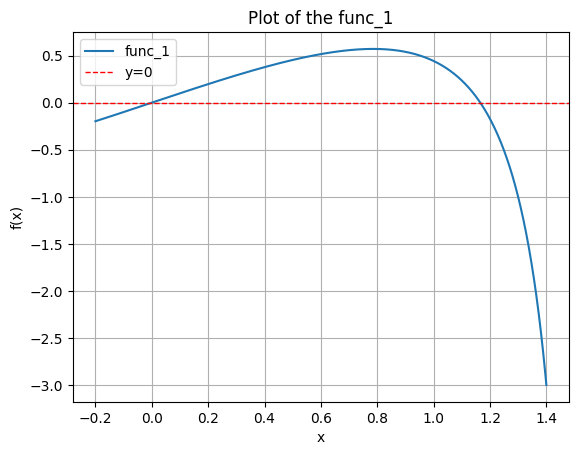

In [225]:
def func_1(x):
    return 2*x - np.tan(x)

def derivative_1(x):
    return 2 - 1/np.cos(x)**2

interval_1 = (-0.2, 1.4)
plot_function(func=func_1, x_range=interval_1)



In [226]:
interval_list_func1 = []
bisection_rootslist_func1 = []
newton_rootslist_func1 = []
self_rootslist_bisect = []
self_rootslist_newton = []
interval_func1_1 = (-0.2, 0.7)
interval_func1_2 = (0.7, 1.4)
interval_list_func1 = [interval_func1_1, interval_func1_2]

for i in range(len(interval_list_func1)):
    root_bisection = bisection_method(func=func_1, interval=interval_list_func1[i], tolerance=tolerance)
    init_guess = (interval_list_func1[i][0] + interval_list_func1[i][1]) / 2
    root_newton = newton_method(func=func_1, derivative=derivative_1, initial_guess=init_guess, tolerance=tolerance)
    bisection_rootslist_func1.append(root_bisection)
    newton_rootslist_func1.append(root_newton)
    
    root_scipy_bisect = bisect(func_1, interval_list_func1[i][0], interval_list_func1[i][1], xtol=tolerance)
    root_scipy_newton = newton(func_1, init_guess, fprime=derivative_1, tol=tolerance)
    self_rootslist_bisect.append(root_scipy_bisect)
    self_rootslist_newton.append(root_scipy_newton)

print(f"My bisection method: {bisection_rootslist_func1}")
print(f"My newton method: {newton_rootslist_func1}")
print(f"Scipy bisection method: {self_rootslist_bisect}")
print(f"Scipy newton method: {self_rootslist_newton}")

My bisection method: [-2.9104030913668706e-12, 1.1655611851776484]
My newton method: [0.0, 1.1655611852072112]
Scipy bisection method: [-2.910386129626216e-11, 1.1655611851369025]
Scipy newton method: [0.0, 1.1655611852072112]


##### Part 3.2 function 2
$e^{x+1} = 2 + x, x\in[-2, 2]$

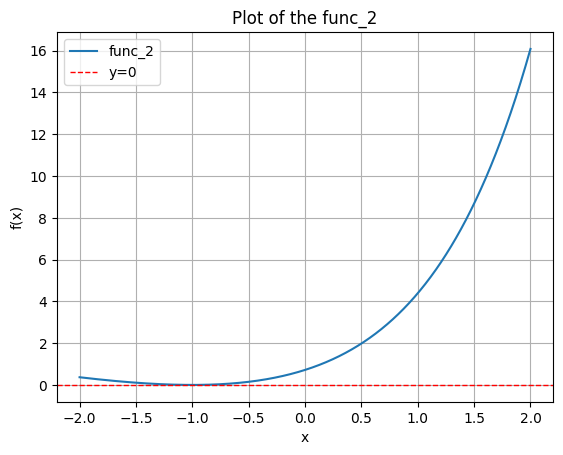

0.0


In [227]:
def func_2(x):
    return np.exp(x+1) - 2 -x

def derivative_2(x):
    return np.exp(x+1) - 1

interval_2 = (-2., 2.)
plot_function(func=func_2, x_range=interval_2)
print(func_2(-1))

In [228]:
interval_list_func2 = []
bisection_rootslist_func2 = []
newton_rootslist_func2 = []
self_rootslist_bisect = []
self_rootslist_newton = []
interval_func2_1 = (-1.5, 0.5)
interval_list_func2 = [interval_func2_1]

for i in range(len(interval_list_func2)):
    # root_bisection = bisection_method(func=func_2, interval=interval_list_func2[i], tolerance=tolerance)
    init_guess = (interval_list_func2[i][0] + interval_list_func2[i][1]) / 2
    root_newton = newton_method(func=func_2, derivative=derivative_2, initial_guess=init_guess, tolerance=tolerance)
    # bisection_rootslist_func2.append(root_bisection)
    newton_rootslist_func2.append(root_newton)
    
    # root_scipy_bisect = bisect(func_2, interval_list_func2[i][0], interval_list_func2[i][1], xtol=tolerance)
    root_scipy_newton = newton(func_2, init_guess, fprime=derivative_2, tol=tolerance)
    # self_rootslist_bisect.append(root_scipy_bisect)
    self_rootslist_newton.append(root_scipy_newton)

# print(f"My bisection method: {bisection_rootslist_func2}")
print(f"My newton method: {newton_rootslist_func2}")
# print(f"Scipy bisection method: {self_rootslist_bisect}")
print(f"Scipy newton method: {self_rootslist_newton}")

My newton method: [-1.0000000113149765]
Scipy newton method: [-1.0000000113149765]


**解释：**
Function 2比较特殊，只有一个根root = -1.0，且为函数的极值点，无法用bisection方法（要求$f(a)*f(b) < 0$）

##### Part 3.3 function 3
$x^{-2} = sin(x), x\in[0.5, 4\pi].$

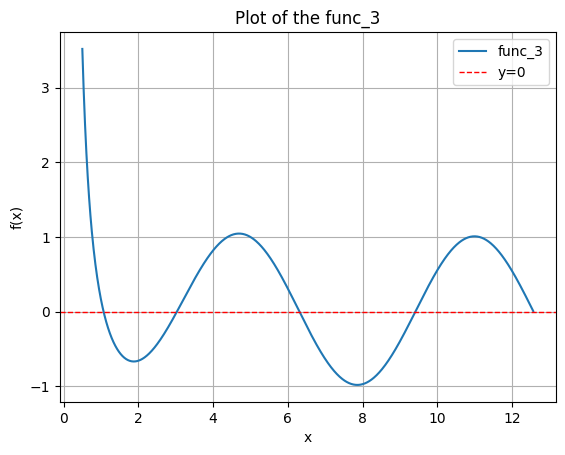

0.006332573977646601


In [229]:
def func_3(x):
    return x**(-2) - np.sin(x)

def derivative_3(x):
    return -2 * x**(-3) - np.cos(x)

interval_3 = (0.5, 4*np.pi)
plot_function(func=func_3, x_range=interval_3)
print(func_3(4*np.pi))

In [230]:
interval_list_func3 = []
bisection_rootslist_func3 = []
newton_rootslist_func3 = []
self_rootslist_bisect = []
self_rootslist_newton = []
interval_func3_1 = (0.5, 2)
interval_func3_2 = (2, 4)
interval_func3_3 = (5, 7)
interval_func3_4 = (8, 10)
interval_list_func3 = [interval_func3_1, interval_func3_2, interval_func3_3, interval_func3_4]

for i in range(len(interval_list_func3)):
    root_bisection = bisection_method(func=func_3, interval=interval_list_func3[i], tolerance=tolerance)
    init_guess = (interval_list_func3[i][0] + interval_list_func3[i][1]) / 2
    root_newton = newton_method(func=func_3, derivative=derivative_3, initial_guess=init_guess, tolerance=tolerance)
    bisection_rootslist_func3.append(root_bisection)
    newton_rootslist_func3.append(root_newton)
    
    root_scipy_bisect = bisect(func_3, interval_list_func3[i][0], interval_list_func3[i][1], xtol=tolerance)
    root_scipy_newton = newton(func_3, init_guess, fprime=derivative_3, tol=tolerance)
    self_rootslist_bisect.append(root_scipy_bisect)
    self_rootslist_newton.append(root_scipy_newton)

print(f"My bisection method: {bisection_rootslist_func3}")
print(f"My newton method: {newton_rootslist_func3}")
print(f"Scipy bisection method: {self_rootslist_bisect}")
print(f"Scipy newton method: {self_rootslist_newton}")

My bisection method: [1.0682235442072852, 3.032645418395987, 6.3083168252778705, 9.413492803141708]
My newton method: [1.068223544197249, 3.032645418388756, 6.3083168252685535, 9.413492803170099]
Scipy bisection method: [1.068223544250941, 3.032645418366883, 6.308316825248767, 9.413492803170811]
Scipy newton method: [1.068223544197249, 3.032645418388756, 6.3083168252685535, 9.413492803170099]


#### Part 4. 误差分析

In [231]:
def func(x):
    return x**2 - 2

def derivative(x):
    return 2*x

root_gt = np.sqrt(2)
interval = (1, 2)
init_guess = (1.5)

In [232]:
def bisection_method_record(func, interval, tolerance):
    a, b = interval
    d_list = []
    if func(a) * func(b) > 0:
        raise ValueError("The function values at the interval endpoints must have opposite signs.")
    
    while (b - a) > tolerance:
        d_list.append(b - a)
        midpoint = (a + b) / 2
        if func(midpoint) == 0:
            return midpoint
        elif func(midpoint) * func(a) < 0:
            b = midpoint
        else:
            a = midpoint
    
    return ((a + b) / 2, d_list)

LARGE_NUM = 999999
def newton_method_record(func, derivative, initial_guess, tolerance):
    x = initial_guess
    d = LARGE_NUM
    d_list = []
    while abs(d) > tolerance:
        x_after = x - func(x) / derivative(x)
        d = x_after - x
        x = x_after
        d_list.append(abs(d))
    return (x, d_list)

In [233]:
(root_bisect, d_list_bisect) = bisection_method_record(func=func, interval=interval, tolerance=tolerance)
(root_newton, d_list_newton) = newton_method_record(func=func, derivative=derivative, initial_guess=init_guess, tolerance=tolerance)
print(f"root_bisect = {root_bisect}")
print(f"root_newton = {root_newton}")
print(d_list_bisect)
print(d_list_newton)

root_bisect = 1.414213562355144
root_newton = 1.4142135623730951
[1, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125, 0.0009765625, 0.00048828125, 0.000244140625, 0.0001220703125, 6.103515625e-05, 3.0517578125e-05, 1.52587890625e-05, 7.62939453125e-06, 3.814697265625e-06, 1.9073486328125e-06, 9.5367431640625e-07, 4.76837158203125e-07, 2.384185791015625e-07, 1.1920928955078125e-07, 5.960464477539063e-08, 2.9802322387695312e-08, 1.4901161193847656e-08, 7.450580596923828e-09, 3.725290298461914e-09, 1.862645149230957e-09, 9.313225746154785e-10, 4.656612873077393e-10, 2.3283064365386963e-10, 1.1641532182693481e-10]
[0.08333333333333326, 0.002450980392156854, 2.123899820016817e-06, 1.5947243525715749e-12]


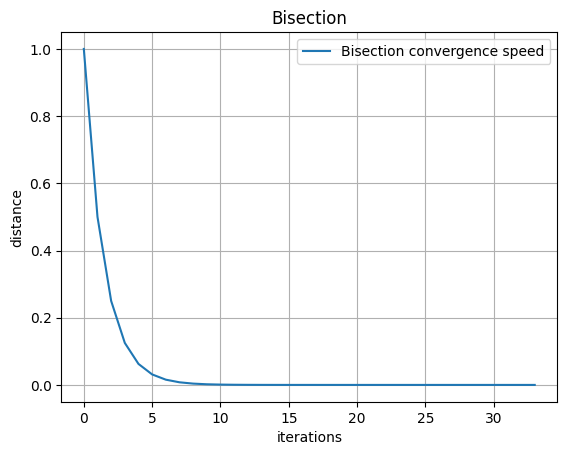

In [234]:
len_list = len(d_list_bisect)
x_values = np.linspace(0, len_list-1, len_list)
plt.plot(x_values, d_list_bisect, label="Bisection convergence speed")

plt.xlabel('iterations')
plt.ylabel('distance')
plt.title('Bisection')

plt.legend()

plt.grid(True)
plt.show()

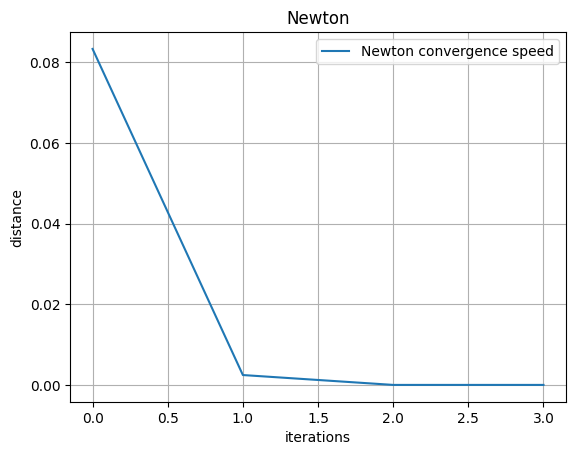

In [235]:
len_list = len(d_list_newton)
x_values = np.linspace(0, len_list-1, len_list)
plt.plot(x_values, d_list_newton, label="Newton convergence speed")

plt.xlabel('iterations')
plt.ylabel('distance')
plt.title('Newton')

plt.legend()

plt.grid(True)
plt.show()